The average solar panel system in Iowa costs $24,930 before the federal tax credit or $17,451 after the credit. This figure assumes that you need a 9 kilowatt (kW) system to offset the average monthly electricity bill of $110 in the state.1

Solar panel installation costs vary based on a number of factors, but the size of your renewable energy system (how many panels you install) is the most significant contributor. So, if you have lower energy needs than the average Iowan, you can save money on solar panels by installing a smaller system.

Most Iowans see pre-tax-credit solar systems costs between $16,600 and $33,240. Solar panel systems are priced per watt, costing an average $2.77 in Iowa. The table below shows how the cost of solar energy systems in Iowa varies by size:

| SIZE OF SOLAR PANEL SYSTEM | IOWA SOLAR PANEL COST | COST AFTER FEDERAL TAX CREDIT | HOME SIZE THIS SYSTEM IS APPROPRIATE FOR|
| --- | --- | --- | --- |
|6 kW | 16,620 | 11,634 | 1,500 sq. ft. |
|7 kW | 19,390 | 13,573 | 1,625 sq. ft. |
|8 kW | 22,160 | 15,512 | 1,750 sq. ft. |
|9 kW | 24,930 | 17,451 | 1,875 sq. ft. |
|10 kW | 27,700 | 19,390 | 2,000 sq. ft. |
|11 kW | 30,470 | 21,329 | 2,125 sq. ft. |
|12 kW | 33,240 | 23,268 | 2,250 sq. ft. |


- from Ecowatch: https://www.ecowatch.com/solar/panel-cost/ia 

ALTERNATE TABLE WITH BETTER RANGES:
https://unboundsolar.com/blog/how-many-solar-panels-to-power-my-home 



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/L2/CatBoost_Sales_Price_Predictions.csv", \
                   index_col=False, na_filter=False)

data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,mo_sold,yr_sold,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict
0,1452,85,RL,75.0,11235,NA,Reg,Lvl,Inside,Gtl,...,11,2007,WD,Normal,0,0,0,43,27,152368.339450
1,1378,50,RM,68.0,4080,Grvl,Reg,Lvl,Inside,Gtl,...,6,2009,WD,Normal,0,0,0,74,11,128849.602049
2,846,30,RL,60.0,10800,Grvl,Reg,Lvl,Inside,Gtl,...,6,2009,WD,Normal,0,0,0,89,59,98678.255442
3,1626,160,RL,36.0,2628,NA,Reg,Lvl,Inside,Gtl,...,6,2010,WD,Normal,0,0,0,7,7,160288.915803
4,1902,20,RL,100.0,17500,NA,Reg,Lvl,Inside,Gtl,...,5,2010,WD,Normal,0,0,1,51,8,309466.153124


In [3]:
data.filter(regex=('sf|area'))

,gr_liv_area,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,garage_area,wood_deck_sf,open_porch_sf,pool_area
0,1452,11235,30.0,785.0,0.0,635.0,1420.0,1452,0,0,572.0,92,0,0
1,1378,4080,0.0,0.0,0.0,901.0,901.0,861,517,0,162.0,54,0,0
2,846,10800,0.0,0.0,0.0,720.0,720.0,846,0,0,576.0,0,0,0
3,1626,2628,106.0,0.0,0.0,764.0,764.0,764,862,0,474.0,0,27,0
4,1902,17500,0.0,1406.0,0.0,496.0,1902.0,1902,0,0,567.0,0,207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1437,10768,0.0,1157.0,0.0,280.0,1437.0,1437,0,0,528.0,0,21,0
254,1459,8749,100.0,0.0,0.0,1459.0,1459.0,1459,0,0,527.0,192,39,0
255,2000,9627,94.0,758.0,0.0,238.0,996.0,996,1004,0,650.0,190,48,0
256,1574,11957,53.0,24.0,0.0,1550.0,1574.0,1574,0,0,824.0,144,104,0


Text(0, 0.5, 'Frequency')

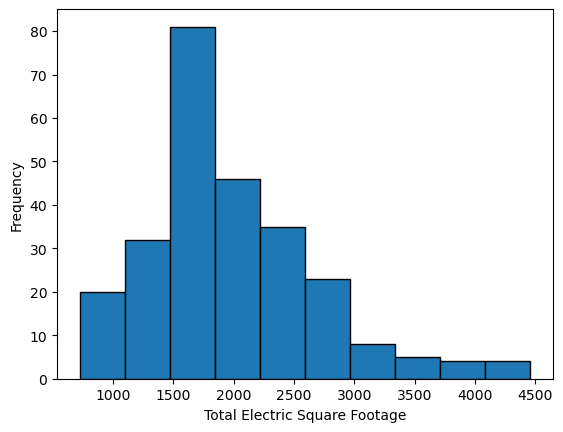

In [4]:
# Total Square Footage that is heated / requires electricity (including garage)
data['total_elec_sf'] = data.bsmt_fin_sf1 + data.gr_liv_area + data.bsmt_fin_sf2

# Plot histogram
plt.hist(data['total_elec_sf'], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Total Electric Square Footage')
plt.ylabel('Frequency')



In [5]:
# Read in the system requirements

sys_req = pd.read_csv('../data/ancillary/unboudnsolar_census_based_pvsystemsize.csv')

In [6]:
sys_req.head()

,Square Footage,Typical System Size kW,# of panels (375W),# of panels (315W)
0,250,0.66,2,3
1,500,1.33,4,5
2,750,1.99,6,7
3,1000,2.66,8,9
4,1250,3.32,9,11


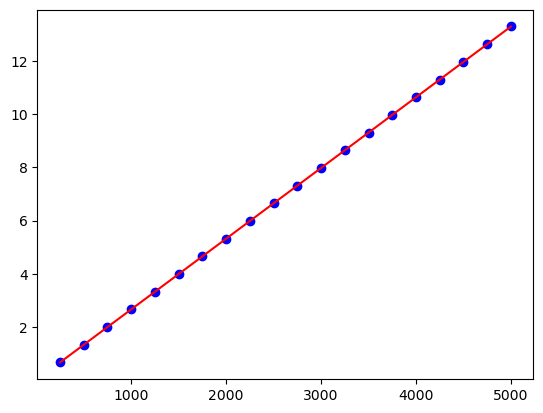

In [7]:
# Bin via scaling / rounding / unscaling the sf estimates in our data

#data['total_elec_sf_binned'] = round(data['total_elec_sf'] / 250.0) * 250.0


# OR REGRESS 
from sklearn.linear_model import LinearRegression

# Split the data into X (features) and y (target)
X = sys_req[['Square Footage']]
y = sys_req['Typical System Size kW']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

new_feature_elec_sf = data['total_elec_sf']
new_feature_elec_sf = pd.DataFrame(new_feature_elec_sf)
new_feature_elec_sf.rename(columns={'total_elec_sf': 'Square Footage'}, inplace=True)

data['est_pv_sys_size_kW'] = regressor.predict(new_feature_elec_sf)

In [8]:
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW
0,1452,85,RL,75.0,11235,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,43,27,152368.339450,2237.0,5.947862
1,1378,50,RM,68.0,4080,Grvl,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,74,11,128849.602049,1378.0,3.662792
2,846,30,RL,60.0,10800,Grvl,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,89,59,98678.255442,846.0,2.247592
3,1626,160,RL,36.0,2628,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,7,7,160288.915803,1626.0,4.322510
4,1902,20,RL,100.0,17500,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,1,51,8,309466.153124,3308.0,8.796883


KeyError: 'est_pv_sys_size'

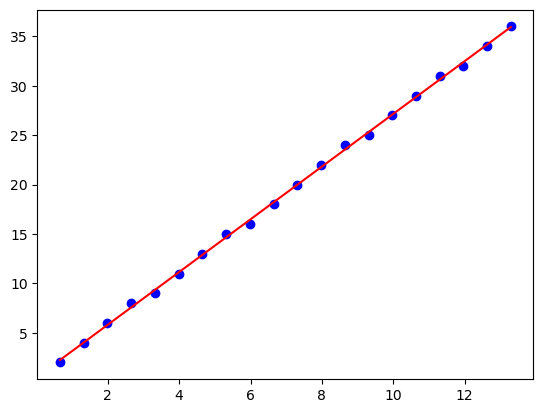

In [9]:
# REgress system size with # of panels

# OR REGRESS 

# Split the data into X (features) and y (target)
X = sys_req[['Typical System Size kW']]
y = sys_req['# of panels (375W)']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

X_new = data['est_pv_sys_size']

X_new = pd.DataFrame(X_new)
X_new.rename(columns={'est_pv_sys_size_kW': 'Typical System Size kW'}, inplace=True)

data['est_num_375W_panels'] = np.round(regressor.predict(X_new))

In [ ]:
# Split the data into X (features) and y (target)
X = sys_req[['Typical System Size kW']]
y = sys_req['# of panels (315W)']

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)


# Plot the regression line and data points
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

X_new = data['est_pv_sys_size_kW']

X_new = pd.DataFrame(X_new)
X_new.rename(columns={'est_pv_sys_size': 'Typical System Size kW'}, inplace=True)

data['est_num_315W_panels'] = np.round(regressor.predict(X_new))

In [10]:
data.head()

,gr_liv_area,ms_sub_class,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,land_slope,...,sale_type,sale_condition,near_rr,near_main_rd,near_pos,house_age_at_sale,construction_age_at_sale,sales_price_predict,total_elec_sf,est_pv_sys_size_kW
0,1452,85,RL,75.0,11235,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,43,27,152368.339450,2237.0,5.947862
1,1378,50,RM,68.0,4080,Grvl,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,74,11,128849.602049,1378.0,3.662792
2,846,30,RL,60.0,10800,Grvl,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,89,59,98678.255442,846.0,2.247592
3,1626,160,RL,36.0,2628,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,0,7,7,160288.915803,1626.0,4.322510
4,1902,20,RL,100.0,17500,NA,Reg,Lvl,Inside,Gtl,...,WD,Normal,0,0,1,51,8,309466.153124,3308.0,8.796883


## Solar panel systems are priced per watt, costing an average $2.77 in Iowa.
source: 
https://www.ecowatch.com/solar/panel-cost/ia

In [ ]:
#data['est_solar_cost_before_incentives'] = data.est_pv_sys_size*1000*2.77

In [ ]:
#data.head()